## COVID-19 DATA VISUALISATION

### Within months, COVID-19 went from an epidemic to a pandemic. We will visualize data from the early months of the coronavirus outbreak to see how this virus grew to be a global pandemic. 

### Coronavirus is a family of viruses that are named after their spiky crown. The novel coronavirus, also known as SARS-CoV-2, is a contagious respiratory virus that first reported in Wuhan, China. On 2/11/2020, the World Health Organization designated the name COVID-19 for the disease caused by the novel coronavirus. This notebook aims at exploring COVID-19 through data analysis and projections using a few sample countries.
### The data used here is from John Hopkins University.

Coronavirus Case Data is provided by https://github.com/CSSEGISandData/COVID-19
Learn more from https://www.who.int/emergencies/diseases/novel-coronavirus-2019
Learn more from https://www.cdc.gov/coronavirus/2019-ncov/
Check out map visualizations from https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6
Source code is on https://github.com/ochanyo/Jenga-School-Project

In [1]:
#set up:Importing packages to be used to analyse data

import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.colors as mcolors
import random
import math
import time
plt.style.use('fivethirtyeight')

In [2]:
#importing the data set to be used and part of cleaning by converting the index column into the date column.

index_col=['date_column']
JohnHopkins=pd.read_csv("JohnHopkins.csv",index_col=['Date'])

In [3]:
JohnHopkins

,State,Country,Lat,Long,Confirmed,Recovered,Deaths,last_update_ts,last_update_tz,Case/Fatality Ratio
Date,,,,,,,,,,
22/01/2020,NaN,Afghanistan,33.0000,65.0000,0.0,0.0,0.0,2020-05-07T14:00:03Z,UTC,#DIV/0!
23/01/2020,NaN,Afghanistan,33.0000,65.0000,0.0,0.0,0.0,2020-05-07T14:00:03Z,UTC,#DIV/0!
24/01/2020,NaN,Afghanistan,33.0000,65.0000,0.0,0.0,0.0,2020-05-07T14:00:03Z,UTC,#DIV/0!
25/01/2020,NaN,Afghanistan,33.0000,65.0000,0.0,0.0,0.0,2020-05-07T14:00:03Z,UTC,#DIV/0!
26/01/2020,NaN,Afghanistan,33.0000,65.0000,0.0,0.0,0.0,2020-05-07T14:00:03Z,UTC,#DIV/0!
...,...,...,...,...,...,...,...,...,...,...
02/05/2020,Zhejiang,China,29.1832,120.0934,1268.0,1265.0,1.0,2020-05-07T14:00:03Z,UTC,1268
03/05/2020,Zhejiang,China,29.1832,120.0934,1268.0,1265.0,1.0,2020-05-07T14:00:03Z,UTC,1268
04/05/2020,Zhejiang,China,29.1832,120.0934,1268.0,1267.0,1.0,2020-05-07T14:00:03Z,UTC,1268


### Quick Examination of the data

The data was examined to quickly view attributes of the data.

In [4]:
JohnHopkins.head(100)

,State,Country,Lat,Long,Confirmed,Recovered,Deaths,last_update_ts,last_update_tz,Case/Fatality Ratio
Date,,,,,,,,,,
22/01/2020,NaN,Afghanistan,33.0,65.0,0.0,0.0,0.0,2020-05-07T14:00:03Z,UTC,#DIV/0!
23/01/2020,NaN,Afghanistan,33.0,65.0,0.0,0.0,0.0,2020-05-07T14:00:03Z,UTC,#DIV/0!
24/01/2020,NaN,Afghanistan,33.0,65.0,0.0,0.0,0.0,2020-05-07T14:00:03Z,UTC,#DIV/0!
25/01/2020,NaN,Afghanistan,33.0,65.0,0.0,0.0,0.0,2020-05-07T14:00:03Z,UTC,#DIV/0!
26/01/2020,NaN,Afghanistan,33.0,65.0,0.0,0.0,0.0,2020-05-07T14:00:03Z,UTC,#DIV/0!
...,...,...,...,...,...,...,...,...,...,...
26/04/2020,NaN,Afghanistan,33.0,65.0,1531.0,207.0,50.0,2020-05-07T14:00:03Z,UTC,30.62
27/04/2020,NaN,Afghanistan,33.0,65.0,1703.0,220.0,57.0,2020-05-07T14:00:03Z,UTC,29.87719298
28/04/2020,NaN,Afghanistan,33.0,65.0,1828.0,228.0,58.0,2020-05-07T14:00:03Z,UTC,31.51724138


In [5]:
JohnHopkins.dtypes

State                   object
Country                 object
Lat                    float64
Long                   float64
Confirmed              float64
Recovered              float64
Deaths                 float64
last_update_ts          object
last_update_tz          object
Case/Fatality Ratio     object
dtype: object

In [6]:
JohnHopkins.tail(100)

,State,Country,Lat,Long,Confirmed,Recovered,Deaths,last_update_ts,last_update_tz,Case/Fatality Ratio
Date,,,,,,,,,,
28/01/2020,Zhejiang,China,29.1832,120.0934,173.0,3.0,0.0,2020-05-07T14:00:03Z,UTC,#DIV/0!
29/01/2020,Zhejiang,China,29.1832,120.0934,296.0,3.0,0.0,2020-05-07T14:00:03Z,UTC,#DIV/0!
30/01/2020,Zhejiang,China,29.1832,120.0934,428.0,4.0,0.0,2020-05-07T14:00:03Z,UTC,#DIV/0!
31/01/2020,Zhejiang,China,29.1832,120.0934,538.0,14.0,0.0,2020-05-07T14:00:03Z,UTC,#DIV/0!
01/02/2020,Zhejiang,China,29.1832,120.0934,599.0,21.0,0.0,2020-05-07T14:00:03Z,UTC,#DIV/0!
...,...,...,...,...,...,...,...,...,...,...
02/05/2020,Zhejiang,China,29.1832,120.0934,1268.0,1265.0,1.0,2020-05-07T14:00:03Z,UTC,1268
03/05/2020,Zhejiang,China,29.1832,120.0934,1268.0,1265.0,1.0,2020-05-07T14:00:03Z,UTC,1268
04/05/2020,Zhejiang,China,29.1832,120.0934,1268.0,1267.0,1.0,2020-05-07T14:00:03Z,UTC,1268


In [7]:
JohnHopkins.info()
JohnHopkins.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 28302 entries, 22/01/2020 to 06/05/2020
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State                8692 non-null   object 
 1   Country              28302 non-null  object 
 2   Lat                  28196 non-null  float64
 3   Long                 28196 non-null  float64
 4   Confirmed            28196 non-null  float64
 5   Recovered            26712 non-null  float64
 6   Deaths               28196 non-null  float64
 7   last_update_ts       28302 non-null  object 
 8   last_update_tz       28302 non-null  object 
 9   Case/Fatality Ratio  28302 non-null  object 
dtypes: float64(5), object(5)
memory usage: 2.4+ MB


,Lat,Long,Confirmed,Recovered,Deaths
count,28196.000000,28196.000000,2.819600e+04,26712.000000,28196.000000
mean,21.259359,22.432499,3.366715e+03,984.113282,221.227302
std,24.701818,70.347551,3.187493e+04,7449.762208,2209.295382
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000
25%,6.877000,-19.020800,0.000000e+00,0.000000,0.000000
50%,23.488100,20.921188,1.100000e+01,0.000000,0.000000
75%,41.153300,78.000000,2.712500e+02,67.000000,3.000000
max,71.706900,178.065000,1.228603e+06,189910.000000,73431.000000


### CREATING NEW DATA FRAMES FOR PLOTTING GRAPHS

Here the data was cleaned  up to remove the Longitude,Latitude and State data which was not required or necessary to plot the graphs for each country.
The new data frame had country,date,confrimed cases,rocveries and deaths.

In [8]:
country_data=JohnHopkins[["Country","Confirmed","Recovered","Deaths"]]

In [9]:
country_data

,Country,Confirmed,Recovered,Deaths
Date,,,,
22/01/2020,Afghanistan,0.0,0.0,0.0
23/01/2020,Afghanistan,0.0,0.0,0.0
24/01/2020,Afghanistan,0.0,0.0,0.0
25/01/2020,Afghanistan,0.0,0.0,0.0
26/01/2020,Afghanistan,0.0,0.0,0.0
...,...,...,...,...
02/05/2020,China,1268.0,1265.0,1.0
03/05/2020,China,1268.0,1265.0,1.0
04/05/2020,China,1268.0,1267.0,1.0


### Worldwide Overview.

### INDIVIDUAL COUNTRY DATA

The country data was obtained from the initial data frame and put into country specific data frames that were used to plot graphs.

In [10]:
#Obtaining Kenya Country Data from the newly created data frame.
select_Kenya=country_data[country_data['Country'] == 'Kenya']
select_Kenya

,Country,Confirmed,Recovered,Deaths
Date,,,,
22/01/2020,Kenya,0.0,0.0,0.0
23/01/2020,Kenya,0.0,0.0,0.0
24/01/2020,Kenya,0.0,0.0,0.0
25/01/2020,Kenya,0.0,0.0,0.0
26/01/2020,Kenya,0.0,0.0,0.0
...,...,...,...,...
02/05/2020,Kenya,435.0,152.0,22.0
03/05/2020,Kenya,465.0,167.0,24.0
04/05/2020,Kenya,490.0,173.0,24.0


<AxesSubplot:title={'center':'Daily COVID-19 Statistics in Kenya'}, xlabel='Date'>

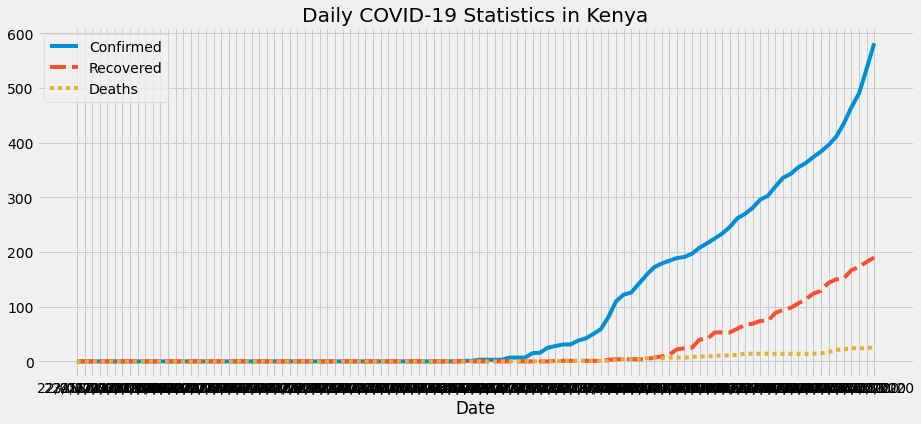

In [11]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding a title to the plot
plt.title ("Daily COVID-19 Statistics in Kenya")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Kenya)

In [12]:
#Obtaining Ghana Country Data from the newly created data frame
select_Ghana=country_data[country_data['Country'] == 'Ghana']
select_Ghana                      

,Country,Confirmed,Recovered,Deaths
Date,,,,
22/01/2020,Ghana,0.0,0.0,0.0
23/01/2020,Ghana,0.0,0.0,0.0
24/01/2020,Ghana,0.0,0.0,0.0
25/01/2020,Ghana,0.0,0.0,0.0
26/01/2020,Ghana,0.0,0.0,0.0
...,...,...,...,...
02/05/2020,Ghana,2169.0,229.0,18.0
03/05/2020,Ghana,2169.0,229.0,18.0
04/05/2020,Ghana,2719.0,294.0,18.0


<AxesSubplot:title={'center':'Daily COVID-19 Statistics in Ghana'}, xlabel='Date'>

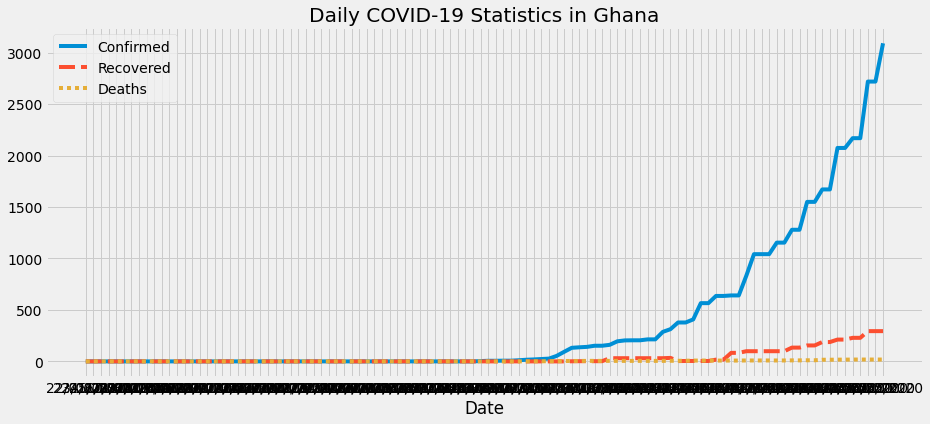

In [13]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding a title to the plot
plt.title ("Daily COVID-19 Statistics in Ghana")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Ghana)

In [ ]:
#Obtaining Egypt Country Data from the newly created data frame.
select_Egypt=country_data[country_data['Country'] == 'Egypt']
select_Egypt

In [ ]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in Egypt")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Egypt)

In [ ]:
#Obtaining Togo Country Data from the newly created data frame.
select_Togo=country_data[country_data['Country'] == 'Togo']
select_Togo

In [ ]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in Togo")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Togo)

In [ ]:
#Obtaining Uganda Country Data from the newly created data frame.
select_Uganda=country_data[country_data['Country'] == 'Uganda']
select_Uganda

In [ ]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in Uganda")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Uganda)

In [ ]:
#Obtaining Rwanda Country Data from the newly created data frame.
select_Rwanda=country_data[country_data['Country'] == 'Rwanda']
select_Rwanda

In [ ]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in Rwanda")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Rwanda)

In [ ]:
#Obtaining Madagascar Country Data from the newly created data frame.
select_Madagascar=country_data[country_data['Country'] == 'Madagascar']
select_Madagascar

In [ ]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in Madagascar")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Madagascar)

In [ ]:
#Obtaining Nigeria Country Data from the newly created data frame.
select_Nigeria=country_data[country_data['Country'] == 'Nigeria']
select_Nigeria

In [ ]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in Nigeria")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Nigeria)

In [ ]:
#Obtaining South Africa Country Data from the newly created data frame.
select_SouthAfrica=country_data[country_data['Country'] == 'South Africa']
select_SouthAfrica

In [ ]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in South Africa")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_SouthAfrica)

In [ ]:
#Obtaining Tanzania Country Data from the newly created data frame.
select_Tanzania=country_data[country_data['Country'] == 'Tanzania']
select_Tanzania

In [ ]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in Tanzania")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Tanzania)

In [ ]:
#Obtaining Burundi Country Data from the newly created data frame.
select_Burundi=country_data[country_data['Country'] == 'Burundi']
select_Burundi

In [ ]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in Burundi")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Burundi)

In [ ]:
#Obtaining Namibia Country Data from the newly created data frame.
select_Namibia=country_data[country_data['Country'] == 'Namibia']
select_Namibia

In [ ]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in Namibia")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Namibia)

In [ ]:
#Obtaining China Country Data from the newly created data frame.
select_China=country_data[country_data['Country'] == 'China']
select_China

In [ ]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in China")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_China)

In [ ]:
#Obtaining India Country Data from the newly created data frame.
select_India=country_data[country_data['Country'] == 'India']
select_India

In [ ]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in India")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_India)

In [ ]:
#Obtaining Japan Country Data from the newly created data frame.
select_Japan=country_data[country_data['Country'] == 'Japan']
select_Japan

In [ ]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in Japan")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Japan)

In [ ]:
#Obtaining Turkey Country Data from the newly created data frame.
select_Turkey=country_data[country_data['Country'] == 'Turkey']
select_Turkey

In [ ]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in Turkey")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Turkey)

In [ ]:
#Obtaining Saudi Arabia Country Data from the newly created data frame.
select_SaudiArabia=country_data[country_data['Country'] == 'Saudi Arabia']
select_SaudiArabia

In [ ]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in Saudi Arabia")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_SaudiArabia)

In [ ]:
#Obtaining Spain Country Data from the newly created data frame.
select_Spain=country_data[country_data['Country'] == 'Spain']
select_Spain

In [ ]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in Spain")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Spain)

In [ ]:
#Obtaining Italy Country Data from the newly created data frame.
select_Italy=country_data[country_data['Country'] == 'Italy']
select_Italy

In [ ]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in Italy")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Italy)

In [ ]:
select_UnitedKingdom=country_data[country_data['Country'] == 'United Kingdom']
select_UnitedKingdom

In [ ]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in United Kingdom")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_UnitedKingdom)

In [ ]:
#Obtaining Germany Country Data from the newly created data frame.
select_Germany=country_data[country_data['Country'] == 'Germany']
select_Germany

In [ ]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in Germany")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Germany)

In [ ]:
#Obtaining Switzerland Country Data from the newly created data frame.
select_Switzerland=country_data[country_data['Country'] == 'Switzerland']
select_Switzerland

In [ ]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in Switzerland")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Switzerland)

In [ ]:
#Obtaining Brazil Country Data from the newly created data frame.
select_Brazil=country_data[country_data['Country'] == 'Brazil']
select_Brazil

In [ ]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in Brazil")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Brazil)

In [ ]:
#Obtaining Venezuela Country Data from the newly created data frame.
select_Venezuela=country_data[country_data['Country'] == 'Venezuela']
select_Venezuela

In [ ]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in Venezuela")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Venezuela)

In [ ]:
#Obtaining Canada Country Data from the newly created data frame.
select_Canada=country_data[country_data['Country'] == 'Canada']
select_Canada

In [ ]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in Canada")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Canada)

In [ ]:
#Obtaining Australia Country Data from the newly created data frame.
select_Australia=country_data[country_data['Country'] == 'Australia']
select_Australia

In [ ]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in Australia")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_Australia)

In [15]:
#Obtaining US Country Data from the newly created data frame.
select_US=country_data[country_data['Country'] == 'US']
select_US

,Country,Confirmed,Recovered,Deaths
Date,,,,
22/01/2020,US,1.0,0.0,0.0
23/01/2020,US,1.0,0.0,0.0
24/01/2020,US,2.0,0.0,0.0
25/01/2020,US,2.0,0.0,0.0
26/01/2020,US,5.0,0.0,0.0
...,...,...,...,...
02/05/2020,US,1132539.0,175382.0,66369.0
03/05/2020,US,1158040.0,180152.0,67682.0
04/05/2020,US,1180375.0,187180.0,68922.0


<AxesSubplot:title={'center':'Daily COVID-19 Statistics in US'}, xlabel='Date'>

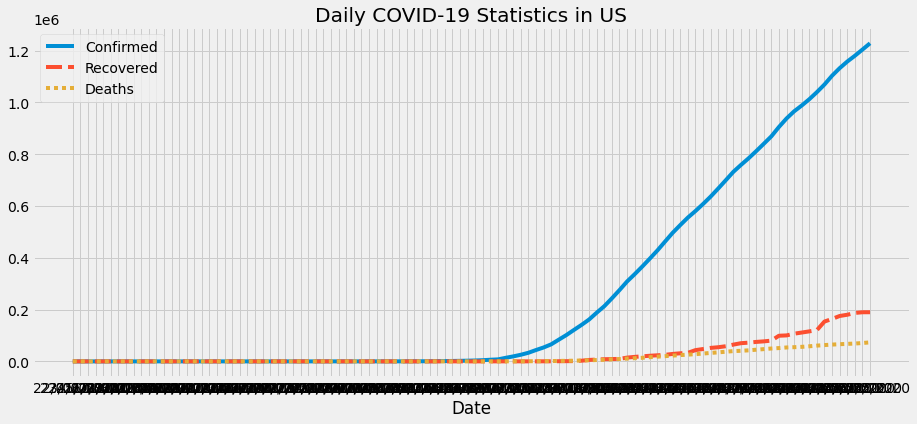

In [16]:
#defining size of the figure
plt.figure(figsize=(14,6))
#adding title to the plot
plt.title ("Daily COVID-19 Statistics in US")
#plotting the data to show how cases evolved over time
sns.lineplot(data=select_US)

### OBSERVATIONS FROM THE DATA AND THE GRAPHS

i.All countries studied showed an exponential increase on the number of cases from the index case.
Confirmed cases,deaths attributed to COVID-19 and Apparent lethality rate for the countries was also skewed in the initial stages of the disease as there was limited testing. This is also attributable to the fact that mild disease went undetected (and untested) till later on in the disease progressed or was severe to warrant testing or testing was expanded to a larger proportion of the population.

ii.The exponential rise in the number of cases is also attributed to community spread within various communities in the different countries. As at first, it looked like an "imported" disease then it began to spread in the community.The exponential rise is also attributed to expanded testing policies by different countries.

iii.From the data, it shows that Italy had the highest lethality rate. However.according to reports by the various countries, the excess mortality rate provided a clear marker for lethality per country.Their argument being they tend to experience slightly more than the reported deaths attributed to COVID-19.The number of “excess” deaths is derived by comparing the number of deaths in every country in a recent period to the statistical average for that period over the preceding five years.

iv.Certain countries graphs levelled off(showed a plateau) at some point. This was explained by reduced testing or certain countries ceasing to test the populations for the disease. 

v.The deaths could also be underreported in the different countries where accces to information is limited and the government limiting information dissemination tho the population and other agencies.

vi.The impact of movement restrictions without other auxilliary measures to combat the virus is seen in the african states as they imposed lockdowns without proper testing strategy and containment of spread hence the spike and increase in the number of positive cases.

### BAR CHART VISUALIZATIONS

This offers us some insights for how different countries/regions compare in terms of covid cases.

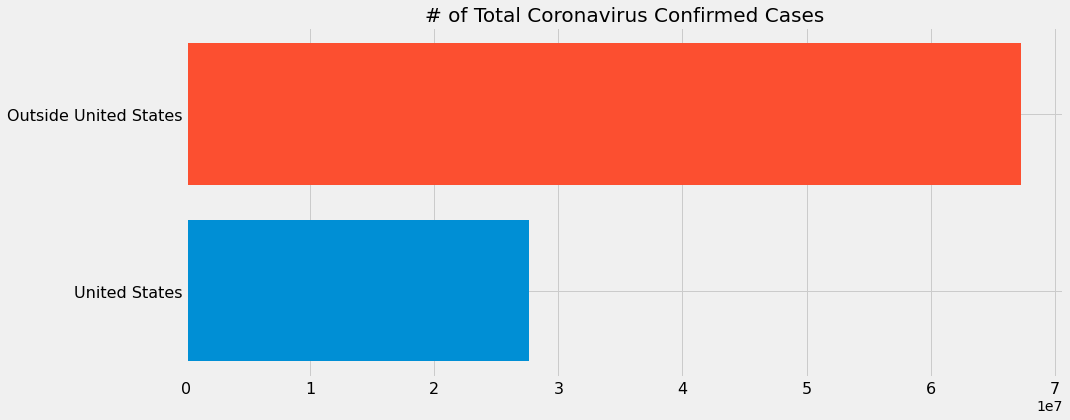

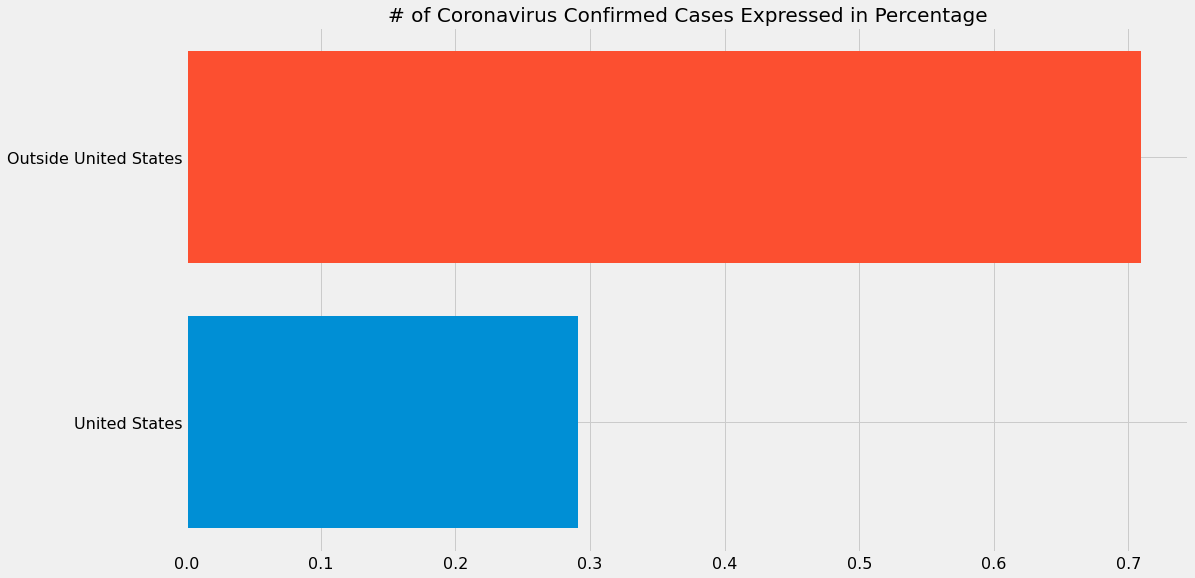

In [17]:
#Comparing cases in the US vis a vis cases in the rest of the world

totalworldcasesconfirmed=JohnHopkins['Confirmed'].sum()
usconfirmed=select_US['Confirmed'].sum()
outside_us_confirmed=totalworldcasesconfirmed-usconfirmed

plt.figure(figsize=(14, 6))
plt.barh('United States', usconfirmed)
plt.barh('Outside United States', outside_us_confirmed)
plt.title('# of Total Coronavirus Confirmed Cases', size=20)
plt.xticks(size=16)
plt.yticks(size=16)
plt.show()

plt.figure(figsize=(16, 9))
plt.barh('United States', usconfirmed/totalworldcasesconfirmed)
plt.barh('Outside United States', outside_us_confirmed/totalworldcasesconfirmed)
plt.title('# of Coronavirus Confirmed Cases Expressed in Percentage', size=20)
plt.xticks(size=16)
plt.yticks(size=16)
plt.show()

In [18]:
print('Outside United States {} cases ({}%):'.format(outside_us_confirmed, np.round((outside_us_confirmed/totalworldcasesconfirmed)*100, 1)))
print('United States {} cases ({}%)'.format(usconfirmed, np.round((usconfirmed/totalworldcasesconfirmed)*100, 1)))
print('Total: {} cases'.format(totalworldcasesconfirmed))

Outside United States 67314320.0 cases (70.9%):
United States 27613580.0 cases (29.1%)
Total: 94927900.0 cases


In [19]:
#Comparing confrimed cases  various states in China
country_data=JohnHopkins[["State","Country","Confirmed","Recovered","Deaths"]]
select_China=country_data[country_data['Country'] == 'China']
select_China

,State,Country,Confirmed,Recovered,Deaths
Date,,,,,
22/01/2020,Anhui,China,1.0,0.0,0.0
23/01/2020,Anhui,China,9.0,0.0,0.0
24/01/2020,Anhui,China,15.0,0.0,0.0
25/01/2020,Anhui,China,39.0,0.0,0.0
26/01/2020,Anhui,China,60.0,0.0,0.0
...,...,...,...,...,...
02/05/2020,Zhejiang,China,1268.0,1265.0,1.0
03/05/2020,Zhejiang,China,1268.0,1265.0,1.0
04/05/2020,Zhejiang,China,1268.0,1267.0,1.0
